In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Modeling prior predictive distribution



In [2]:
allergies = CmdStanModel(stan_file='stan_files/model_1.stan')

INFO:cmdstanpy:compiling stan file /root/docs/data_analytics_2023_hszwast/lab_3/stan_files/model_1.stan to exe file /root/docs/data_analytics_2023_hszwast/lab_3/stan_files/model_1
INFO:cmdstanpy:compiled model executable: /root/docs/data_analytics_2023_hszwast/lab_3/stan_files/model_1


In [47]:
samples = allergies.sample(fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


     lp__  accept_stat__     N     y         p
0     0.0            0.0  50.0  12.0  0.139737
1     0.0            0.0  50.0   0.0  0.013008
2     0.0            0.0  50.0   5.0  0.077947
3     0.0            0.0  50.0   9.0  0.143875
4     0.0            0.0  50.0   4.0  0.055462
..    ...            ...   ...   ...       ...
995   0.0            0.0  50.0   8.0  0.114394
996   0.0            0.0  50.0  11.0  0.324963
997   0.0            0.0  50.0  24.0  0.585109
998   0.0            0.0  50.0  11.0  0.227135
999   0.0            0.0  50.0  32.0  0.539367

[1000 rows x 5 columns]


<AxesSubplot:ylabel='Frequency'>

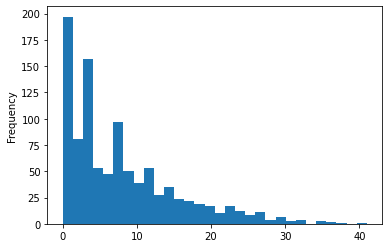

In [4]:
draws_pd = samples.draws_pd()
print(draws_pd)
draws_pd['y'].plot.hist(bins=30)


In [5]:
# Ratio mean
(draws_pd['y'] / 50).mean()

## It's slightly lower than the expected 20%

0.15963999999999998

### Modeling posterior and posterior predictive distribution



In [48]:
allergies_2 = CmdStanModel(stan_file='stan_files/model_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [49]:
# Generate samples using cmdstanpy
data = {'N': 50, 'y': 7}
samples = allergies_2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:ylabel='Frequency'>

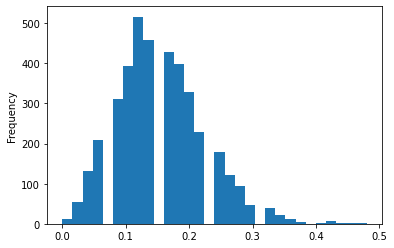

In [71]:
y_pred = samples.draws_pd()['y_pred']
ratio = y_pred / 50
ratio.plot.hist(bins=30)

In [90]:
print('Expected value of predicted ratio:', ratio.mean())
print('94% density interval of predicted ratio:', az.hdi(ratio.values, hdi_prob=0.94))
print('Expected value of parameter p:', samples.summary()['Mean'][1])
print('94% density interval of parameter p:', az.hdi(samples.draws_pd()['p'].values, hdi_prob=0.94))


Expected value of predicted ratio: 0.15287
94% density interval of predicted ratio: [0.04 0.28]
Expected value of parameter p: 0.15
94% density interval of parameter p: [0.0678323 0.241442 ]


In [91]:
print('Probability that ratio is lower than the average probability from traditional vaccines:', (ratio < 0.2).mean())

Probability that ratio is lower than the average probability from traditional vaccines: 0.7275
